## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## Importing the Dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
X = dataset.iloc[:, 3:].values

## Using the Elbow method to find the optimal number of Clusters

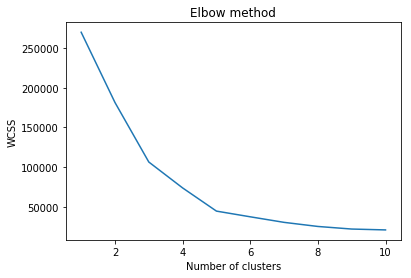

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Applying K-Means to the dataset

In [6]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

## Visualising the Clusters

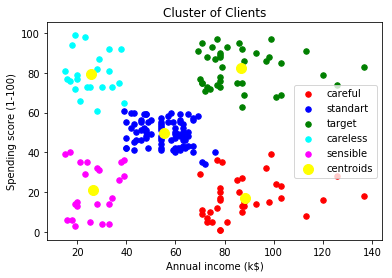

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=30, c='red', label='careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=30, c='blue', label='standart')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=30, c='green', label='target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=30, c='cyan', label='careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=30, c='magenta', label='sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()